# EDA-- Kaggle| House Price

Before jumping onto the model, Exploratory Data Analysis (EDA) is an important and time-consuming step to better under the characteristics of our data. It will involve lots of statistical graphics and data visualization techniques.

Competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

EDA: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

Download data from: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

#### Description:
    
With 79 explanatory variables describing (almost) every aspect of residential homes, this competition challenges you to predict the final price of each home.

### Contents:

* step 0. import data
* step 0.5. Get some understanding about the variables
* step 1. Analyzing the dependent variable: SalePrice
* step 2. Take a look at the relationship between dependent/independent variable
* step 3. Handle Missing data
* step 4. Handle Outliers
* step 5. Getting hard core
* step 6. Dummy Variables

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## step 0. import data

In [2]:
df_train = pd.read_csv('./data/house-price/train.csv')

In [3]:
# the size of the dataset
df_train.shape

(1460, 81)

In [4]:
# show the first 5 rows
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## step 0.5. Get some understanding about the variables

We take a look at what each variable means and get some sense about whether a given variable is important/relevent to the question:

* Do we think about this variable when we are buying a house? (size, location ...)
* If so, how important would this variable be?
* Is this information already described in any other variable? (LandContour and LandSlop descripe similar information)

Some selected variables:

* `OverallQual`: Rates the overall material and finish of the house
* `YearBuilt`: Original construction date
* `TotalBsmtSF`: Total square feet of basement area
* `GrLivArea`: Above grade (ground) living area square feet

## step 1. Analyzing the dependent variable: SalePrice

In [6]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/zhicongliang/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


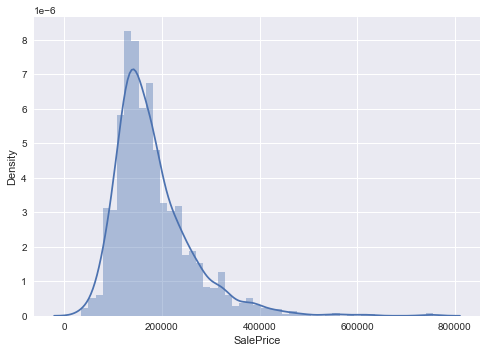

In [7]:
#histogram
sns.distplot(df_train['SalePrice']);

Characteristics of SalePrice

* Deviate from the normal distribution.
* Have appreciable positive skewness (lean to left, mean>median).
* Show peakedness.

In [8]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


For normal distribution

* Skewness=0

* Kurtosis=3

## step 2. Take a look at the relationship between dependent/independent variable

### numerical variables

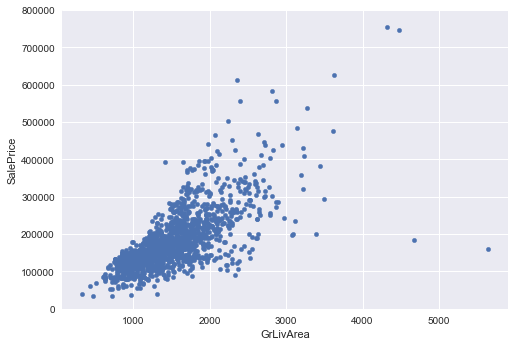

In [9]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
df_train.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

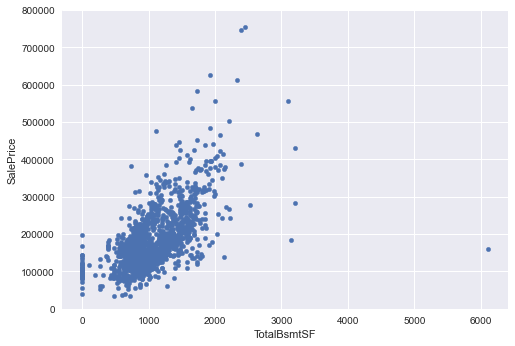

In [10]:
var = 'TotalBsmtSF'
df_train.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### categorical variables

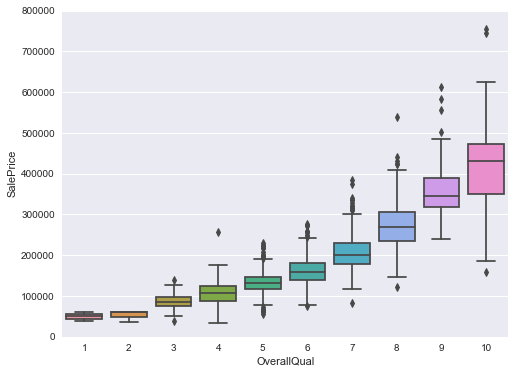

In [11]:
# box plot overallqual/saleprice
# explanation of boxplot: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
var = 'OverallQual'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=df_train)
fig.axis(ymin=0, ymax=800000);

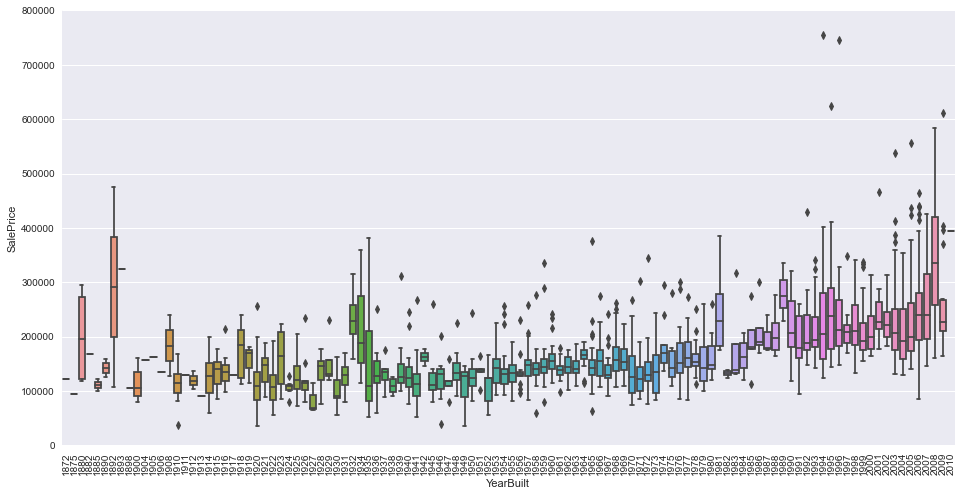

In [12]:
var = 'YearBuilt'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=df_train)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

###  summary:

* `GrLivArea` and `TotalBsmtSF` seem to be linearly related with `SalePrice`. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.

* `OverallQual` and `YearBuilt` also seem to be related with `SalePrice`. The relationship seems to be stronger in the case of `OverallQual`, where the box plot shows how sales prices increase with the overall quality.

### correlation matrix for all variables

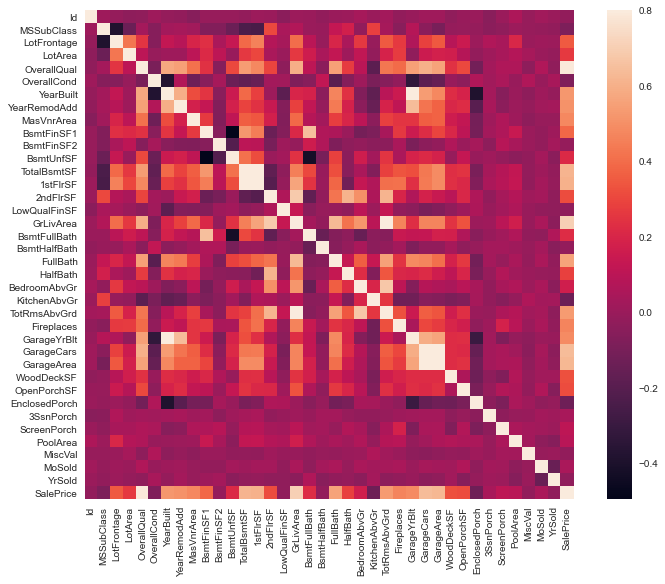

In [13]:
#correlation matrix of all numerical variable
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### Summary:

* There is strong correlation between `TotalBsmtSF` and `1stFlrSF`.
Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs.
* `GrLivArea`, `TotalBsmtSF`, and `OverallQual` are good variables, while some other variables should also be taken into consideration

### Varibles with top 10 correlation with SalesPrice

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


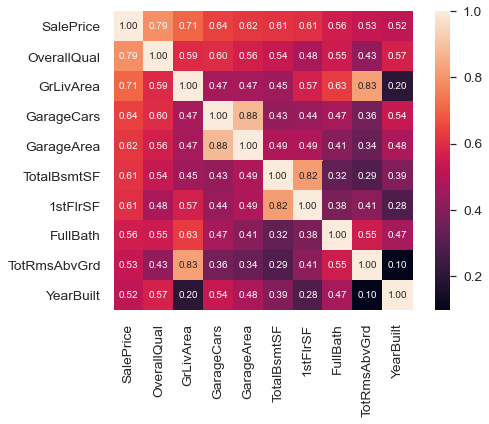

In [14]:
# select the variables with top 10 correlation with SalePrice
k = 10

# nlargest: Return the first n rows ordered by columns in descending order.
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(df_train[cols].values.T)

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### summary:

* `GrLivArea`, `TotalBsmtSF`, and `OverallQual` are good variables
* `GarageCars` and `GarageArea` are also some of the most strongly correlated variables (the number of cars that fit into the garage is a consequence of the garage area). We can keep `GarageCars` since its correlation with 'SalePrice' is higher).
* `TotalBsmtSF` and `1stFloor` also seem to be twin brothers. We can keep `TotalBsmtSF` only.
* `TotRmsAbvGrd` and `GrLivArea`, twin brothers again.

/Users/zhicongliang/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


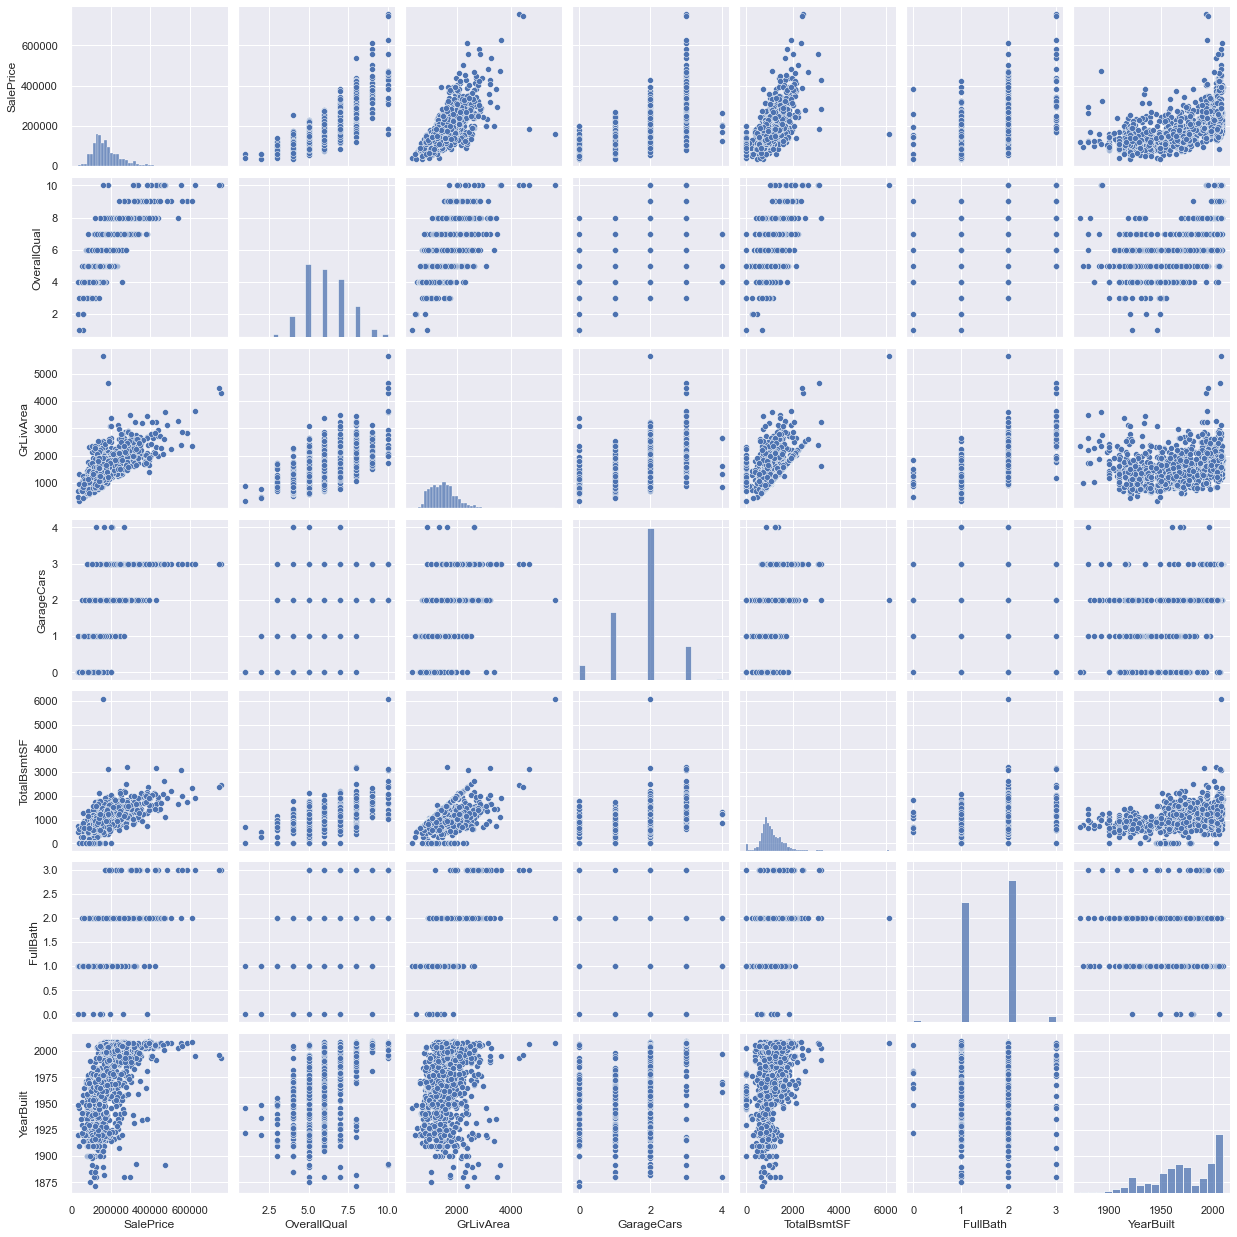

In [15]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

## step 3. Handle Missing data

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [16]:
# count NaN in each columns and sort them in descending order
total = df_train.isnull().sum().sort_values(ascending=False)

In [17]:
total

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [18]:
percent = total/df_train.shape[0]
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### handling missing data

* We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. `PoolQC`, `MiscFeature`, `Alley`, etc.) that we should delete.

* Before we delete these variables, we need to think twice whether these variables are actually not important when we want to buy a house

* We can see that `Garage XXX` variables have the same number of missing data. We bet missing data refers to the same set of observations. Since the most important information regarding garages is expressed by `GarageCars` and considering that we are just talking about 5% of missing data, we'll delete the mentioned `Garage XXX` variables. The same logic applies to `Bsmt XXX` variables.

* Regarding `MasVnrArea` and `MasVnrType`, we can consider that these variables are not essential.

* Finally, we have one missing observation in `Electrical`. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable `Electrical`. In `Electrical` we'll just delete the observation with missing data.

In [19]:
# directly drop columns with lots of missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
# drop the row with NaN in 'Electrical'
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
#just checking that there's no missing data missing...
df_train.isnull().sum().max()

0

In [20]:
# size of the remaining dataset
df_train.shape

(1459, 63)

## step 4. Handle Outliers

Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

### Univariate analysis

The primary concern here is to establish a `threshold` that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [21]:
#standardizing data
# here we use np.newaxis to transform a 1-D array to 2-D, which is required by StandardScaler.fit_transform
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
print('Mean: {:.4f} -- Std: {:.4f}'.format(saleprice_scaled.mean(), saleprice_scaled.std()))
print('\n')

# show the top/bottom 10 values
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

Mean: 0.0000 -- Std: 1.0000


outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


/Users/zhicongliang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


* Low range values are ~ -1.5
* High range values are far from 0 and the 7.XXX values are really out of range.
For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.XXX values.

### Bivariate analysis

We return to the scatter plot between `GrLivArea` and `SalePrice`.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


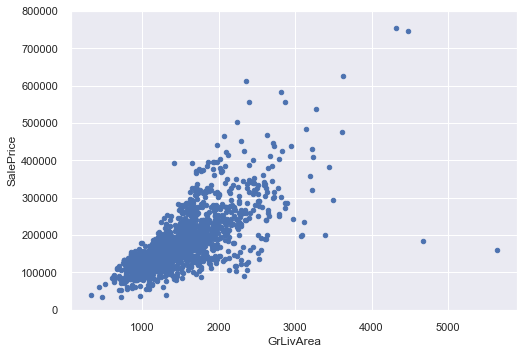

In [22]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
df_train.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

What has been revealed:

The two values with bigger `GrLivArea` seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. We are not sure about this but we are quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.

The two observations in the top of the plot are those 7.XXX observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [23]:
#deleting points with top 2 largest 'GrLivArea'
outliers = df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
print(outliers['GrLivArea'])
df_train = df_train.drop(outliers['GrLivArea'].index)

1298    5642
523     4676
Name: GrLivArea, dtype: int64


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


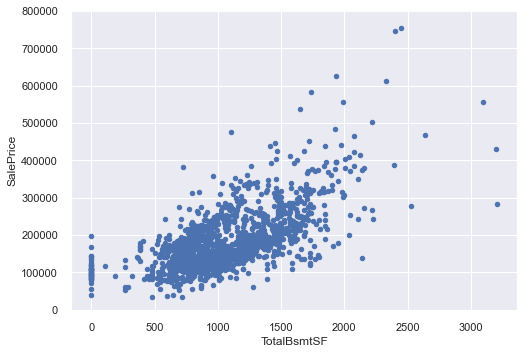

In [24]:
#bivariate analysis saleprice/TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

There are no significant outliers.

## step 5. Getting hard core

Here we will talk about some `testings` for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discovered a lot about `SalePrice`. Now it's time to go deep and understand how `SalePrice` complies with the statistical assumptions that enables us to apply multivariate techniques.

### Normality

When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for `SalePrice` (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

/Users/zhicongliang/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74240.99917988208, 180942.13864104328, 0.9320520365889887))

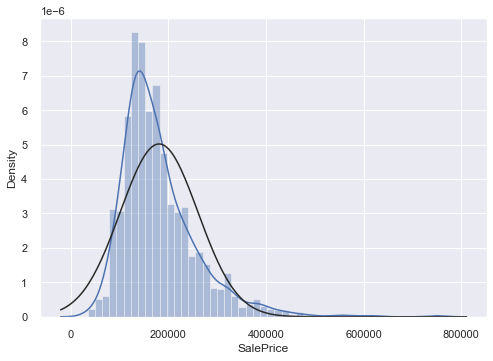

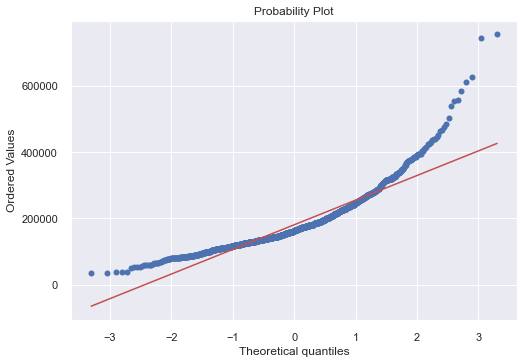

In [25]:
# histogram and normal probability plot

# fit=norm here further plots the curve of normal distribution with the same mean and variance as df_train['SalePrice']
f = plt.figure()
sns.distplot(df_train['SalePrice'], fit=norm)

f = plt.figure()
## explanation of Probplot: https://towardsdatascience.com/explaining-probability-plots-9e5c5d304703
#Interpretation of the points on the plot: assuming we have two distributions (f and g) 
# and a point of evaluation z (any value), the point on the plot indicates what percentage 
# of data lies at or below z in both f and g (as per definition of the CDF).
stats.probplot(df_train['SalePrice'], plot=plt)

`SalePrice` is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: **in case of positive skewness, log transformations usually works well**.

In [26]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

/Users/zhicongliang/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


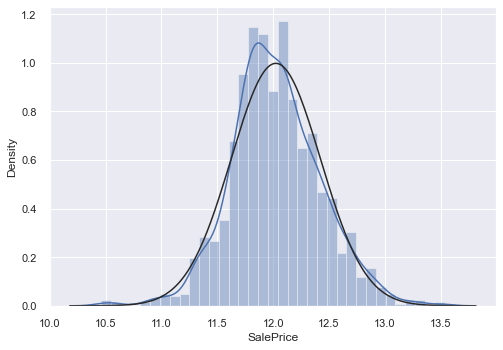

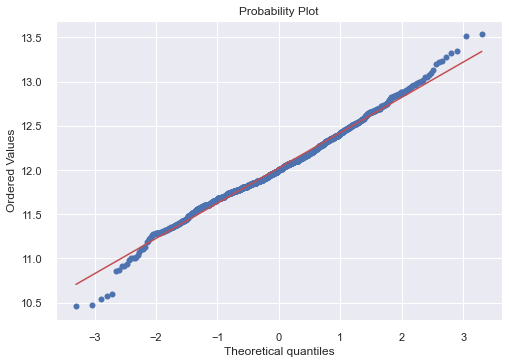

In [27]:
#transformed histogram and normal probability plot
f = plt.figure()
sns.distplot(df_train['SalePrice'], fit=norm);
f = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

### Linearity

The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

### Absence of correlated errors

Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

### Homoscedasticity

Homoscedasticity refers to the "assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)". Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

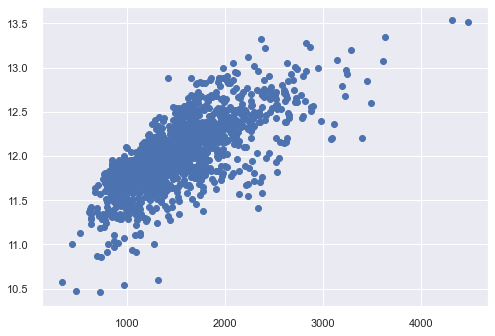

In [28]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check scatter plots between `SalePrice` and `GrLivArea`). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

## step 6. Dummy Varibles

In [29]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [30]:
df_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [31]:
df_train.shape

(1457, 221)

In [32]:
# we can see that 'LandContour' has 4 values (Lvl, Bnk, HLS, Low), 
# then pd.get_dummies will use create 4 new variables with their values as suffix
df_train.columns[df_train.columns.str.contains('LandContour')]

Index(['LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl'],
      dtype='object')

In [33]:
## example of using pd.get_dummies

In [34]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})

In [35]:
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [36]:
pd.get_dummies(df)

,C,A_a,A_b,B_a,B_b,B_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1
